# Susi Nurindahsari - DBA2265584
### Product Departement



# Libraries and Access File

Menghubungkan dengan gdrive untuk mengakses file csv hasil ekstrak dari postgresql dan import libraries untuk membantu mengolah data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/datasetfinpro"

/content/drive/MyDrive/datasetfinpro


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pprint import pprint
import statsmodels.api as sm
from pandas import datetime

Membaca file products_data dengan menyimpan dalam variabel data_products

In [ ]:
data_products = pd.read_csv("products_data.csv")

data_products

,product_id,product_category,product_name,product_departement,created_at,sold_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
0,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-09-16,NaN,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
1,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-03-22,NaN,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
2,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2022-03-23,2022-03-26,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
3,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-10-06,NaN,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
4,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-02-16,NaN,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487389,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-12-25,2022-01-15,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487390,29120,Accessories,Boconi Collins Calf Billfold,Men,2020-08-23,NaN,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487391,29120,Accessories,Boconi Collins Calf Billfold,Men,2019-07-31,2019-09-04,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487392,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-03-20,NaN,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667


# Data Cleaning

Membersihkan data yang berisi null values dan outliers

Mengetahui informasi tentang data_products (kolom apa saja, berapa jumlah baris yang memiliki values, tipe data, dan jumlah keseluruhan baris data)

In [ ]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   product_id                      487394 non-null  int64  
 1   product_category                487394 non-null  object 
 2   product_name                    487359 non-null  object 
 3   product_departement             487394 non-null  object 
 4   created_at                      487394 non-null  object 
 5   sold_at                         180508 non-null  object 
 6   cost                            487394 non-null  float64
 7   product_retail_price            487394 non-null  float64
 8   product_distribution_center_id  487394 non-null  int64  
 9   brand                           487020 non-null  object 
 10  name                            487394 non-null  object 
 11  latitude                        487394 non-null  float64
 12  longitude       

Mengecek dengan pasti kolom mana saja yang terdapat null values

In [ ]:
data_products.isnull().any()

product_id                        False
product_category                  False
product_name                       True
product_departement               False
created_at                        False
sold_at                            True
cost                              False
product_retail_price              False
product_distribution_center_id    False
brand                              True
name                              False
latitude                          False
longitude                         False
dtype: bool

Setelah dilihat, diketahui terdapat 3 kolom yang berisi null values, yaitu product_name, sold_at, dan brand

Mengecek seberapa banyak baris data yang null dari kolom product_name, sold_at, dan brand

In [ ]:
data_products["product_name"].isnull().sum()

35

In [ ]:
data_products["sold_at"].isnull().sum()

306886

In [ ]:
data_products["brand"].isnull().sum()

374

Karena kolom sold_at terlalu banyak memiliki null values, yaitu 306886 baris (hampir 80% dari keseluruhan baris), jika terus digunakan atau dihapus seluruh baris yang null, maka akan mengganggu pengolahan data, lebih baik didrop atau dihapus saja

In [ ]:
data_products = data_products.drop(['sold_at'], axis = 1)
data_products

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
0,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-09-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
1,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-03-22,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
2,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2022-03-23,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
3,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-10-06,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
4,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-02-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...,...,...
487389,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-12-25,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487390,29120,Accessories,Boconi Collins Calf Billfold,Men,2020-08-23,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487391,29120,Accessories,Boconi Collins Calf Billfold,Men,2019-07-31,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487392,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-03-20,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667


Menghapus null values dari keseluruhan kolom yang memiliki baris kosong

In [ ]:
dp = data_products.dropna()
dp

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
0,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-09-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
1,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-03-22,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
2,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2022-03-23,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
3,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-10-06,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
4,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-02-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...,...,...
487389,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-12-25,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487390,29120,Accessories,Boconi Collins Calf Billfold,Men,2020-08-23,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487391,29120,Accessories,Boconi Collins Calf Billfold,Men,2019-07-31,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487392,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-03-20,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667


Melihat informasi terbaru setelah step pembersihan data

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486985 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   product_id                      486985 non-null  int64  
 1   product_category                486985 non-null  object 
 2   product_name                    486985 non-null  object 
 3   product_departement             486985 non-null  object 
 4   created_at                      486985 non-null  object 
 5   cost                            486985 non-null  float64
 6   product_retail_price            486985 non-null  float64
 7   product_distribution_center_id  486985 non-null  int64  
 8   brand                           486985 non-null  object 
 9   name                            486985 non-null  object 
 10  latitude                        486985 non-null  float64
 11  longitude                       486985 non-null  float64
dtypes: float64(4), i

In [ ]:
dp.isnull().any()

product_id                        False
product_category                  False
product_name                      False
product_departement               False
created_at                        False
cost                              False
product_retail_price              False
product_distribution_center_id    False
brand                             False
name                              False
latitude                          False
longitude                         False
dtype: bool

Pengecekan terakhir apakah masih ada yang memiliki null values atau tidak, ternyata sudah bersih

# Exploratory Data Analysis (EDA)

Mengetahui lebih dekat tentang data. Pertama, membagi tabel menjadi 2 variabel, yaitu variabel numerical dan categorical untuk mempermudah dalam memfokuskan pemahaman data dan pembersihan outliers

In [ ]:
numerical_features = dp.select_dtypes(include="number").columns.tolist()
categorical_features = dp.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features, compact=True)
print("------------------------------------------------------------------------")
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['product_id', 'cost', 'product_retail_price', 'product_distribution_center_id',
 'latitude', 'longitude']
------------------------------------------------------------------------
Categorical features:
['product_category', 'product_name', 'product_departement', 'created_at',
 'brand', 'name']


## Numerical Describe

Melihat summary statistic dari variabel numerical

In [ ]:
dp[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,486985.0,15290.631812,8408.864599,1.0000,8043.000000,16031.000000,22557.000000,29120.000000
cost,486985.0,28.755192,30.638189,0.0083,11.394300,19.955011,34.707000,557.151002
product_retail_price,486985.0,59.792537,65.890471,0.0200,24.870001,39.990002,69.959999,999.000000
product_distribution_center_id,486985.0,4.993883,2.896451,1.0000,2.000000,5.000000,8.000000,10.000000
latitude,486985.0,34.940779,4.424202,29.7604,30.694400,34.050000,39.950000,41.836900
longitude,486985.0,-88.558606,11.756757,-118.2500,-90.066700,-88.043100,-79.933300,-73.783400


## Correlation

Melihat korelasi dari setiap kolom numerikal

In [ ]:
dp.corr()

,product_id,cost,product_retail_price,product_distribution_center_id,latitude,longitude
product_id,1.000000,-0.008831,-0.001777,0.018680,-0.001947,-0.008509
cost,-0.008831,1.000000,0.982521,0.005495,-0.032469,0.001069
product_retail_price,-0.001777,0.982521,1.000000,-0.007627,-0.034072,-0.004253
product_distribution_center_id,0.018680,0.005495,-0.007627,1.000000,-0.236394,0.426583
latitude,-0.001947,-0.032469,-0.034072,-0.236394,1.000000,0.360989
longitude,-0.008509,0.001069,-0.004253,0.426583,0.360989,1.000000


Menggunakan heatmap untuk memvisualisasikan korelasi antar kolom numerikal

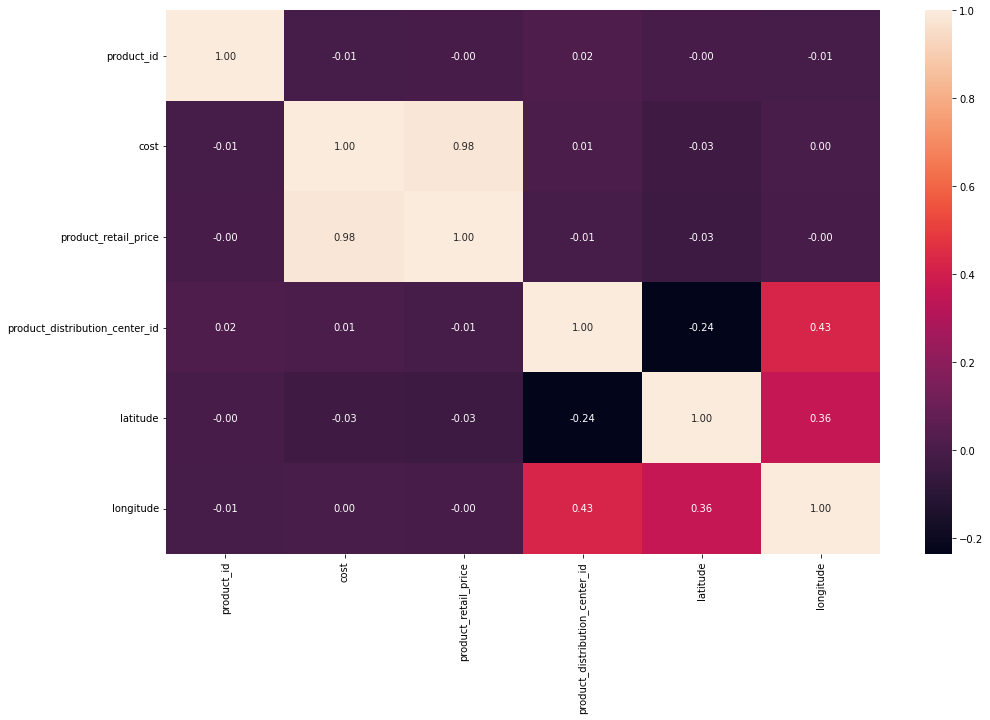

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(dp.corr(), annot=True, fmt=".2f")
plt.show()

Ternyata kolom cost dan product_retail_price memiliki korelasi strong positive ditandai dengan warna yang sangat cerah, latitude dengan product_retail_price memiliki korelasi strong negative ditandai dengan warna yang sangat gelap, sedangkan kolom lainnya memiliki korelasi positif dan negatif yang rata-rata berada di tengah atau biasa saja

Melihat lebih jelas dengan boxplot untuk mengetahui kolom mana saja yang terdapat outliers

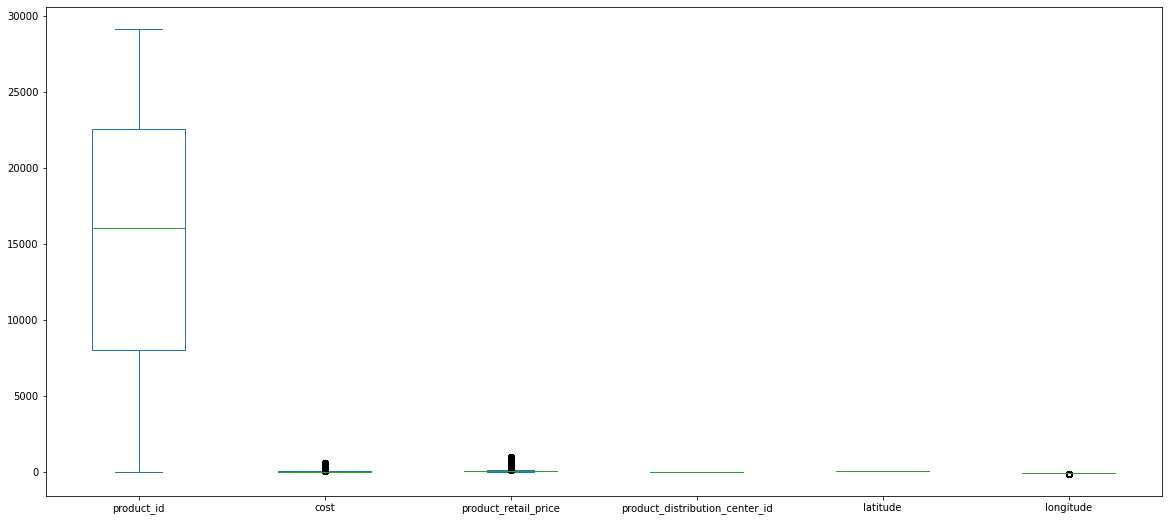

In [ ]:
dp[numerical_features].plot(kind="box", figsize=(20, 9))
plt.grid(False)
plt.show()

Ternyata ada 3 kolom yang memiliki outliers, yaitu kolom cost, product_retail_price, dan longitude

Memisahkan kolom product_id agar bisa lebih dekat melihat outliers dalam kolom cost, product_retail_price, dan longitude

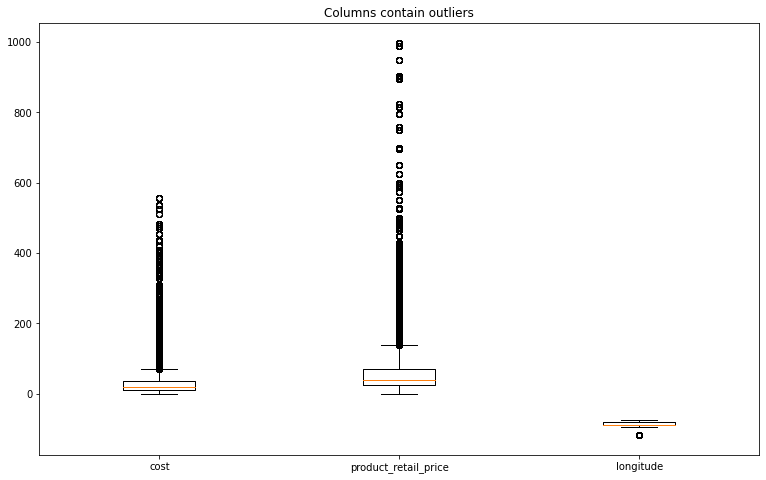

In [ ]:
fig = plt.figure(figsize =(10, 6))
data1 = dp['cost']
data2 = dp['product_retail_price']
data3 = dp['longitude']
outlier = [data1 , data2, data3]
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(outlier)

# x-axis labels
ax.set_xticklabels(['cost', 'product_retail_price', 'longitude'])
 
# Adding title
plt.title("Columns contain outliers")
# show plot
plt.show()

Terlihat longitude memiliki outliers negatif, sedangkan cost dan product_retail_price positif

Mengecek persebaran data kolom cost dan product_retail_price yang memiliki korelasi sangat kuat

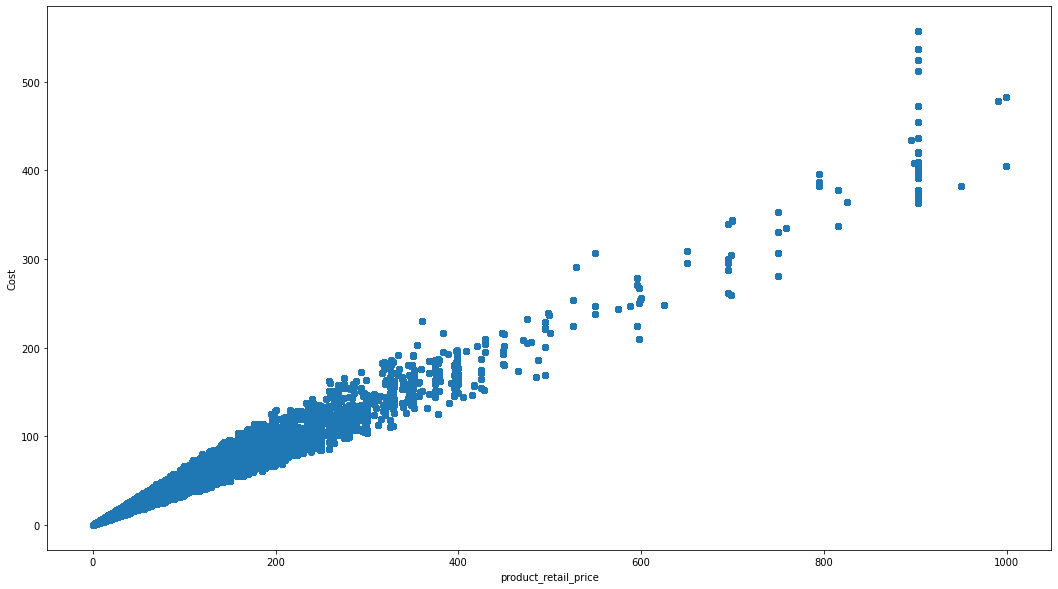

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
# ax.scatter(dp['cost'], dp['product_retail_price'])
ax.scatter(dp['product_retail_price'], dp['cost'])
 
# x-axis label
# ax.set_xlabel('Cost')
ax.set_xlabel('product_retail_price')
 
# y-axis label
# ax.set_ylabel('Product Retail Price')
ax.set_ylabel('Cost')
plt.show()

### Handling Outliers

Saatnya membersihkan outliers

#### Cost Column

Pembersihan outliers dimulai dari kolom cost. Pertama, melihat kuartil 1 dan 3

In [ ]:
# Cost Column
Q1_cost = dp.cost.quantile(0.25)
Q3_cost = dp.cost.quantile(0.75)
Q1_cost, Q3_cost

(11.394299838260562, 34.707000033929944)

Menghitung interkuartil

In [ ]:
IQR_cost = Q3_cost - Q1_cost
IQR_cost

23.312700195669382

Menghitung batas atas dan batas bawah untuk menghapus data yang berada di luar batas atas dan batas bawah

In [ ]:
lower_limit_cost = Q1_cost - 1.5*IQR_cost
upper_limit_cost = Q3_cost + 1.5*IQR_cost
lower_limit_cost, upper_limit_cost

(-23.574750455243514, 69.67605032743401)

Mengecek seberapa banyak outliers dalam kolom cost

In [ ]:
# Cek seberapa banyak outliers
dp[(dp.cost<lower_limit_cost)|(dp.cost>upper_limit_cost)]

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
68,6,Tops & Tees,Wilt Women's Color Blocked Big Mixed Slant Top,Women,2021-10-02,78.936,132.0,6,Wilt,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
69,6,Tops & Tees,Wilt Women's Color Blocked Big Mixed Slant Top,Women,2021-07-20,78.936,132.0,6,Wilt,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
70,6,Tops & Tees,Wilt Women's Color Blocked Big Mixed Slant Top,Women,2022-01-23,78.936,132.0,6,Wilt,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
71,6,Tops & Tees,Wilt Women's Color Blocked Big Mixed Slant Top,Women,2021-11-25,78.936,132.0,6,Wilt,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
72,6,Tops & Tees,Wilt Women's Color Blocked Big Mixed Slant Top,Women,2021-11-20,78.936,132.0,6,Wilt,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
...,...,...,...,...,...,...,...,...,...,...,...,...
486724,29084,Accessories,Oakley Men's Radar Path Iridium Polarized Sung...,Men,2022-05-04,107.380,260.0,8,Oakley,Mobile AL,30.6944,-88.0431
486725,29084,Accessories,Oakley Men's Radar Path Iridium Polarized Sung...,Men,2021-01-27,107.380,260.0,8,Oakley,Mobile AL,30.6944,-88.0431
486726,29084,Accessories,Oakley Men's Radar Path Iridium Polarized Sung...,Men,2021-11-05,107.380,260.0,8,Oakley,Mobile AL,30.6944,-88.0431
486727,29084,Accessories,Oakley Men's Radar Path Iridium Polarized Sung...,Men,2019-03-25,107.380,260.0,8,Oakley,Mobile AL,30.6944,-88.0431


Terlihat ada 37064 baris

Menghapus 37064 baris outliers

In [ ]:
dp2 = dp[(dp.cost>lower_limit_cost)&(dp.cost<upper_limit_cost)]
dp2

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
0,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-09-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
1,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-03-22,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
2,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2022-03-23,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
3,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-10-06,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
4,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-02-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...,...,...
487389,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-12-25,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487390,29120,Accessories,Boconi Collins Calf Billfold,Men,2020-08-23,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487391,29120,Accessories,Boconi Collins Calf Billfold,Men,2019-07-31,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487392,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-03-20,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667


Setelah cost outliers dihapus, sisa baris ada 449921 

#### Product Retail Price Column

Saatnya membersihkan kolom product_retail_price dari outliers. Langkah-langkah yang sama seperti pembersihkan outliers pada kolom cost

In [ ]:
# Product Retail Price Column
Q1_prp = dp2.product_retail_price.quantile(0.25)
Q3_prp = dp2.product_retail_price.quantile(0.75)
Q1_prp , Q3_prp 

(22.989999771118164, 60.0)

In [ ]:
IQR_prp  = Q3_prp  - Q1_prp 
IQR_prp 

37.010000228881836

In [ ]:
lower_limit_prp  = Q1_prp  - 1.5*IQR_prp 
upper_limit_prp  = Q3_prp  + 1.5*IQR_prp 
lower_limit_prp , upper_limit_prp 

(-32.52500057220459, 115.51500034332275)

In [ ]:
# Cek seberapa banyak outliers
dp2[(dp2.product_retail_price<lower_limit_prp )|(dp2.product_retail_price>upper_limit_prp )]

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
1497,95,Tops & Tees,Bailey 44 Women's Thin Lizzy Top,Women,2022-05-13,65.461,121.0,6,Bailey 44,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
1498,95,Tops & Tees,Bailey 44 Women's Thin Lizzy Top,Women,2020-08-04,65.461,121.0,6,Bailey 44,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
1499,95,Tops & Tees,Bailey 44 Women's Thin Lizzy Top,Women,2021-09-11,65.461,121.0,6,Bailey 44,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
1500,95,Tops & Tees,Bailey 44 Women's Thin Lizzy Top,Women,2021-06-20,65.461,121.0,6,Bailey 44,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
1501,95,Tops & Tees,Bailey 44 Women's Thin Lizzy Top,Women,2022-05-16,65.461,121.0,6,Bailey 44,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
...,...,...,...,...,...,...,...,...,...,...,...,...
485777,29034,Accessories,Oakley Big Taco Oversized Polarized Sunglasses,Men,2021-12-17,49.742,119.0,8,Oakley,Mobile AL,30.6944,-88.0431
485778,29034,Accessories,Oakley Big Taco Oversized Polarized Sunglasses,Men,2021-07-16,49.742,119.0,8,Oakley,Mobile AL,30.6944,-88.0431
485779,29034,Accessories,Oakley Big Taco Oversized Polarized Sunglasses,Men,2022-01-18,49.742,119.0,8,Oakley,Mobile AL,30.6944,-88.0431
485780,29034,Accessories,Oakley Big Taco Oversized Polarized Sunglasses,Men,2022-03-09,49.742,119.0,8,Oakley,Mobile AL,30.6944,-88.0431


Terdapat 21651 baris data outliers dalam kolom product_retail_price

Saatnya menghapus outliers pada kolom product_retail_price

In [ ]:
dp3 = dp2[(dp2.product_retail_price>lower_limit_prp)&(dp2.product_retail_price<upper_limit_prp)]
dp3

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
0,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-09-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
1,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-03-22,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
2,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2022-03-23,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
3,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-10-06,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
4,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-02-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...,...,...
487389,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-12-25,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487390,29120,Accessories,Boconi Collins Calf Billfold,Men,2020-08-23,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487391,29120,Accessories,Boconi Collins Calf Billfold,Men,2019-07-31,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487392,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-03-20,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667


Setelah outliers pada kolom product_retail_price dihapus, baris data terbaru berjumlah 428270 baris

Mengecek persebaran terbaru setelah outliers dari kedua kolom cost dan product_retail_price dibersihkan

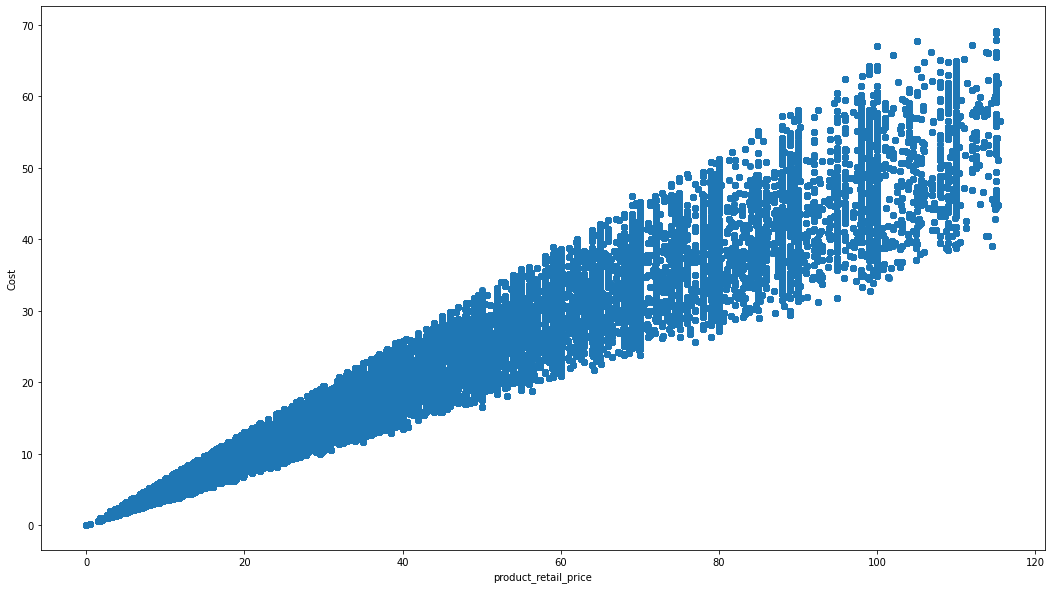

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
# ax.scatter(dp['cost'], dp['product_retail_price'])
ax.scatter(dp3['product_retail_price'], dp3['cost'])
 
# x-axis label
# ax.set_xlabel('Cost')
ax.set_xlabel('product_retail_price')
 
# y-axis label
# ax.set_ylabel('Product Retail Price')
ax.set_ylabel('Cost')
plt.show()

Hasilnya terlihat jauh lebih rapi daripada persebaran sebelumnya

#### Longitude Column

Terakhir, pembersihan outliers pada kolom longitude. Langkah yang digunakan sama seperti 2 kolom sebelumnya

In [ ]:
# Longitude Column
Q1_long = dp3.longitude.quantile(0.25)
Q3_long = dp3.longitude.quantile(0.75)
Q1_long , Q3_long 

(-90.0667, -79.9333)

In [ ]:
IQR_long  = Q3_long  - Q1_long
IQR_long

10.133399999999995

In [ ]:
lower_limit_long  = Q1_long  - 1.5*IQR_long 
upper_limit_long  = Q3_long  + 1.5*IQR_long
lower_limit_long , upper_limit_long

(-105.26679999999999, -64.73320000000001)

Cek jumlah outliers pada longitude

In [ ]:
# Cek seberapa banyak outliers
dp3[(dp3.longitude<lower_limit_long )|(dp3.longitude>upper_limit_long )]

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
332,21,Tops & Tees,Volcom Juniors Pocket Blocket Long Sleeve Tee,Women,2020-12-18,14.41800,27.00,4,Volcom,Los Angeles CA,34.05,-118.25
333,21,Tops & Tees,Volcom Juniors Pocket Blocket Long Sleeve Tee,Women,2020-06-28,14.41800,27.00,4,Volcom,Los Angeles CA,34.05,-118.25
334,21,Tops & Tees,Volcom Juniors Pocket Blocket Long Sleeve Tee,Women,2020-04-12,14.41800,27.00,4,Volcom,Los Angeles CA,34.05,-118.25
335,21,Tops & Tees,Volcom Juniors Pocket Blocket Long Sleeve Tee,Women,2022-05-08,14.41800,27.00,4,Volcom,Los Angeles CA,34.05,-118.25
336,21,Tops & Tees,Volcom Juniors Pocket Blocket Long Sleeve Tee,Women,2020-10-27,14.41800,27.00,4,Volcom,Los Angeles CA,34.05,-118.25
...,...,...,...,...,...,...,...,...,...,...,...,...
487165,29107,Accessories,Levi's Men's Laminate Reversible Leather Belt,Men,2021-03-01,7.81609,19.99,4,Levi's,Los Angeles CA,34.05,-118.25
487166,29107,Accessories,Levi's Men's Laminate Reversible Leather Belt,Men,2021-05-24,7.81609,19.99,4,Levi's,Los Angeles CA,34.05,-118.25
487167,29107,Accessories,Levi's Men's Laminate Reversible Leather Belt,Men,2021-10-16,7.81609,19.99,4,Levi's,Los Angeles CA,34.05,-118.25
487168,29107,Accessories,Levi's Men's Laminate Reversible Leather Belt,Men,2020-02-06,7.81609,19.99,4,Levi's,Los Angeles CA,34.05,-118.25


Outliers yang paling banyak diraih oleh kolom longitude dengan jumlah 43423 baris

In [ ]:
dp_fin = dp3[(dp3.longitude>lower_limit_long)&(dp3.longitude<upper_limit_long)]
dp_fin

,product_id,product_category,product_name,product_departement,created_at,cost,product_retail_price,product_distribution_center_id,brand,name,latitude,longitude
0,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-09-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
1,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-03-22,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
2,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2022-03-23,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
3,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2021-10-06,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
4,1,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Women,2020-02-16,27.048,49.0,1,Seven7,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...,...,...
487389,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-12-25,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487390,29120,Accessories,Boconi Collins Calf Billfold,Men,2020-08-23,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487391,29120,Accessories,Boconi Collins Calf Billfold,Men,2019-07-31,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667
487392,29120,Accessories,Boconi Collins Calf Billfold,Men,2021-03-20,29.484,78.0,5,Boconi,New Orleans LA,29.9500,-90.0667


Final data dari pembersihan outliers 3 kolom tersebut adalah 384847 baris

## Categorical Describe

Melihat summary dari data categorical, seperti jumlah baris, data unik, top data, dan jumlah dari top data

In [ ]:
dp_fin[categorical_features].describe().T

,count,unique,top,freq
product_category,384847,26,Intimates,33340
product_name,384847,21570,Wrangler Men's Premium Performance Cowboy Cut ...,147
product_departement,384847,2,Women,195915
created_at,384847,1272,2022-04-10,784
brand,384847,2348,Allegra K,16392
name,384847,9,Memphis TN,58685


Melihat dengan lebih detail dalam masing-masing kolom tentang jumlah data di setiap data unik dan ada data unik apa saja di setiap kolom dengan diurutkan berdasarkan data terbanyak

In [ ]:
for feature in categorical_features:
    print(dp_fin[feature].value_counts())
    print ('------')

Intimates                        33340
Tops & Tees                      27359
Fashion Hoodies & Sweatshirts    27040
Shorts                           25604
Sleep & Lounge                   25420
Sweaters                         22648
Swim                             22042
Accessories                      21770
Active                           20848
Underwear                        19884
Jeans                            18930
Pants                            15663
Socks                            15175
Maternity                        12090
Outerwear & Coats                11951
Dresses                          10384
Plus                             10026
Socks & Hosiery                   8950
Pants & Capris                    7871
Leggings                          7533
Suits & Sport Coats               6651
Blazers & Jackets                 5594
Skirts                            4796
Jumpsuits & Rompers               1983
Suits                              876
Clothing Sets            

Melihat informasi terbaru dari products_data sebelum masuk ke bagian modeling

In [ ]:
dp_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384847 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   product_id                      384847 non-null  int64  
 1   product_category                384847 non-null  object 
 2   product_name                    384847 non-null  object 
 3   product_departement             384847 non-null  object 
 4   created_at                      384847 non-null  object 
 5   cost                            384847 non-null  float64
 6   product_retail_price            384847 non-null  float64
 7   product_distribution_center_id  384847 non-null  int64  
 8   brand                           384847 non-null  object 
 9   name                            384847 non-null  object 
 10  latitude                        384847 non-null  float64
 11  longitude                       384847 non-null  float64
dtypes: float64(4), i

Mengeksport data yang sudah dibersihkan ke dalam excel dan csv untuk kemudahan dalam visualisasi di Tableau dan pengambilan kolom yang diperlukan dalam modeling menggunakan postgresql

In [ ]:
# dp_fin.to_excel('products_data_final.xlsx', sheet_name='sheet1', index=False)
dp_fin.to_csv('products_data_final.csv', index=False)

# Modeling

Melakukan modeling dengan algoritma prophet untuk forecasting penjualan produk

Import warning untuk tidak menampilkan warning yang bisa jadi mengganggu tampilan output

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

Import libraries yang dibutuhkan dalam proses forecasting

In [ ]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
import plotly.graph_objs as go
from scipy.stats import boxcox
from sklearn import preprocessing
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

Membaca file forecasting_file yang sudah dibuat di postgresql

In [ ]:
prod_sum = pd.read_csv("forecasting_file.csv")
# prod_sum.iloc[350:400]
prod_sum

,per_tanggal,product_sum
0,2018-11-11,1
1,2018-11-16,1
2,2018-11-28,1
3,2018-12-01,1
4,2018-12-04,2
...,...,...
1267,2022-06-02,20
1268,2022-06-03,12
1269,2022-06-04,9
1270,2022-06-05,2


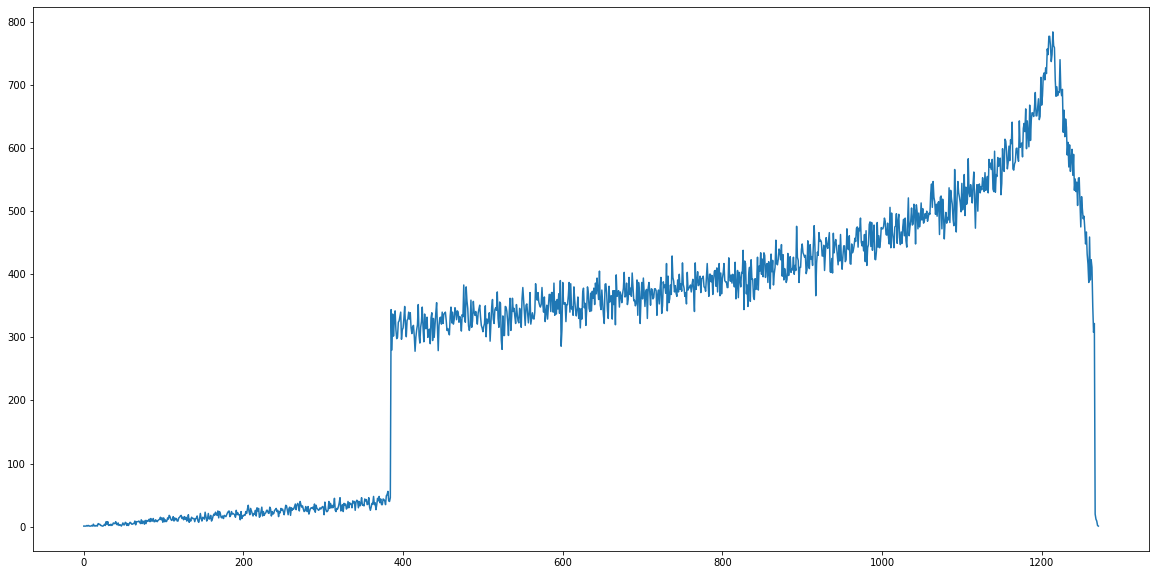

In [ ]:
plt.figure(figsize=(20, 10))
prod_sum['product_sum'].plot()

Setelah dibuat plot untuk membaca data dengan lebih baik, data yang ada terlihat awal-awal kisaran 0-50 dengan jumlah hampir 400 data, kemudian jomplang ke angka 300-800.

Pengecekan data jomplang

In [ ]:
# prod_sum.tail(10)
prod_sum.iloc[350:400]

,per_tanggal,product_sum
350,2019-11-28,35
351,2019-11-29,33
352,2019-11-30,44
353,2019-12-01,41
354,2019-12-02,43
355,2019-12-03,35
356,2019-12-04,36
357,2019-12-05,46
358,2019-12-06,31
359,2019-12-07,26


Ternyata, data berbeda jauh pada index 384-385 pada tanggal 2020-01-01 dan 2020-01-02. Jika tidak dihapus, maka akan mengganggu proses forecasting

Sebelum lanjut, cek info data terlebih dahulu. Apakah kolom per_tanggal sudah dalam tipe data datetime atau belum

In [ ]:
prod_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   per_tanggal  1272 non-null   object
 1   product_sum  1272 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.0+ KB


Ternyata kolom per_tanggal belum bertipe data datetime, diubah terlebih dahulu

In [ ]:
prod_sum['per_tanggal']= pd.to_datetime(prod_sum['per_tanggal'], format='%Y-%m-%d')

Cek kembali informasi tipe data. Sudah tergantikan tipe data kolom per_tanggal dari object ke datetime64

In [ ]:
prod_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   per_tanggal  1272 non-null   datetime64[ns]
 1   product_sum  1272 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.0 KB


Oleh karena data jomplang akan mengganggu forecasting jika tidak dihapus, maka drop baris dari index 0-388 yang memiliki data di bawah 300

In [ ]:
prod_sum.drop(prod_sum.index[:385], inplace=True)
# prod_sum.drop(prod_sum[(prod_sum['product_sum'] < 300)].index, inplace=True)

Cek kembali data. Sehingga, modeling dilakukan mulai tanggal 2 Januari 2020

In [ ]:
# prod_sum.iloc[:50]
prod_sum

,per_tanggal,product_sum
385,2020-01-02,344
386,2020-01-03,280
387,2020-01-04,337
388,2020-01-05,302
389,2020-01-06,327
...,...,...
1267,2022-06-02,20
1268,2022-06-03,12
1269,2022-06-04,9
1270,2022-06-05,2


Terlihat pada 5 baris terakhir ada data jomplang juga, namun setelah dicoba forecasting menimbulkan erro, sehingga baris tersebut dibiarkan saja

Mengubah nama kolom per_tanggal dan product_sum menjadi ds dan y sesuai dengan keinginan prophet

In [ ]:
prod_sum.columns = ['ds', 'y']

Plotting data untuk melihat lebih jelas bentuk data

In [ ]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=prod_sum['ds'], y=prod_sum['y'], name='Products',))
fig.show()

Menstabilkan varians dan membuat data lebih seperti distribusi normal

In [ ]:
# Apply Box-Cox Transform and save the lambda for later inverse.
prod_sum['y'], lam = boxcox(prod_sum['y'])
print('Lambda is:', lam)

Lambda is: 0.8156312199445456


Normalisasi data

In [ ]:
prod_sum['y_norm'] = preprocessing.normalize([prod_sum['y'].values])[0]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=prod_sum['ds'], y=prod_sum['y_norm'], name='Products',))
fig.show()

## Forecasting

Memulai forecasting dengan prophet

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(prod_sum)

Forecasting dengan periode 180 hari

In [ ]:
future = m.make_future_dataframe(periods=180,freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,137.978165,90.546628,159.818374,137.978165,137.978165,-15.073191,-15.073191,-15.073191,-16.619751,...,0.057031,0.057031,0.057031,1.489529,1.489529,1.489529,0.0,0.0,0.0,122.904974
1,2020-01-03,138.113126,84.433706,156.457648,138.113126,138.113126,-16.095309,-16.095309,-16.095309,-16.619751,...,-1.036113,-1.036113,-1.036113,1.560554,1.560554,1.560554,0.0,0.0,0.0,122.017816
2,2020-01-04,138.248087,89.327758,161.434142,138.248087,138.248087,-14.957414,-14.957414,-14.957414,-16.619751,...,0.008706,0.008706,0.008706,1.653631,1.653631,1.653631,0.0,0.0,0.0,123.290673
3,2020-01-05,138.383048,88.907693,161.648429,138.383048,138.383048,-15.207640,-15.207640,-15.207640,-16.619751,...,-0.361308,-0.361308,-0.361308,1.773419,1.773419,1.773419,0.0,0.0,0.0,123.175408
4,2020-01-06,138.518009,89.482289,156.494947,138.518009,138.518009,-15.120555,-15.120555,-15.120555,-16.619751,...,-0.424366,-0.424366,-0.424366,1.923561,1.923561,1.923561,0.0,0.0,0.0,123.397454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2022-11-29,226.097239,166.106465,239.448935,214.154557,238.022728,-22.172925,-22.172925,-22.172925,-16.619751,...,1.154477,1.154477,1.154477,-6.707651,-6.707651,-6.707651,0.0,0.0,0.0,203.924314
1063,2022-11-30,226.107282,165.885584,242.714877,214.029471,238.101174,-22.796539,-22.796539,-22.796539,-16.619751,...,0.601572,0.601572,0.601572,-6.778360,-6.778360,-6.778360,0.0,0.0,0.0,203.310743
1064,2022-12-01,226.117326,168.093988,239.273713,213.901288,238.197874,-23.357493,-23.357493,-23.357493,-16.619751,...,0.057031,0.057031,0.057031,-6.794774,-6.794774,-6.794774,0.0,0.0,0.0,202.759832
1065,2022-12-02,226.127369,166.298796,239.537051,213.773104,238.302882,-24.410176,-24.410176,-24.410176,-16.619751,...,-1.036113,-1.036113,-1.036113,-6.754313,-6.754313,-6.754313,0.0,0.0,0.0,201.717193


Melihat informasi tentang hasil forecasting

In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1067 non-null   datetime64[ns]
 1   trend                       1067 non-null   float64       
 2   yhat_lower                  1067 non-null   float64       
 3   yhat_upper                  1067 non-null   float64       
 4   trend_lower                 1067 non-null   float64       
 5   trend_upper                 1067 non-null   float64       
 6   additive_terms              1067 non-null   float64       
 7   additive_terms_lower        1067 non-null   float64       
 8   additive_terms_upper        1067 non-null   float64       
 9   daily                       1067 non-null   float64       
 10  daily_lower                 1067 non-null   float64       
 11  daily_upper                 1067 non-null   float64     

Plotting hasil forecasting

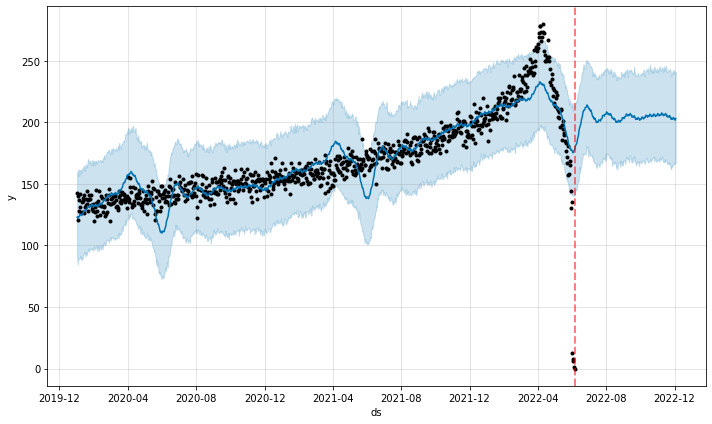

In [ ]:
# Plotting with Prophet built-in method
fig = m.plot(forecast)
ax = fig.add_subplot(111)
ax.axvline(x=forecast['ds'].max() - pd.Timedelta('180 days'), c='red', lw=2, alpha=0.5, ls='--')
fig.show()

Melihat data yang memiliki kemungkinan untuk perubahan rate (where the trend model is shifting)

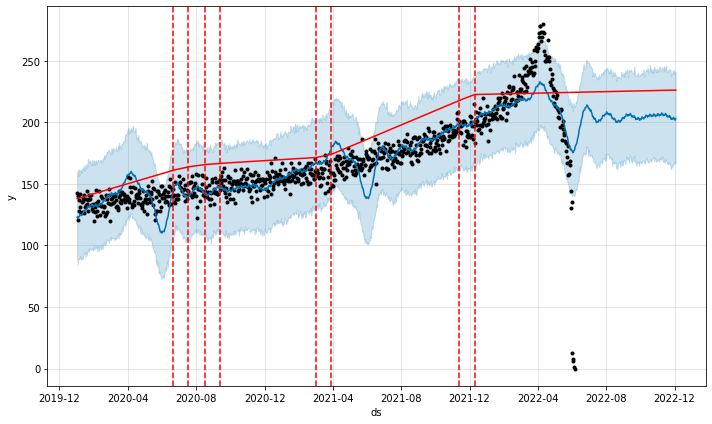

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Pada kisaran bulan 6-9 tahun 2020, bulan 4 tahun 2021, dan bulan 12 tahun 2021 memiliki kemungkinan perubahan rate data

Melihat grafik forecasting dari setiap komponen

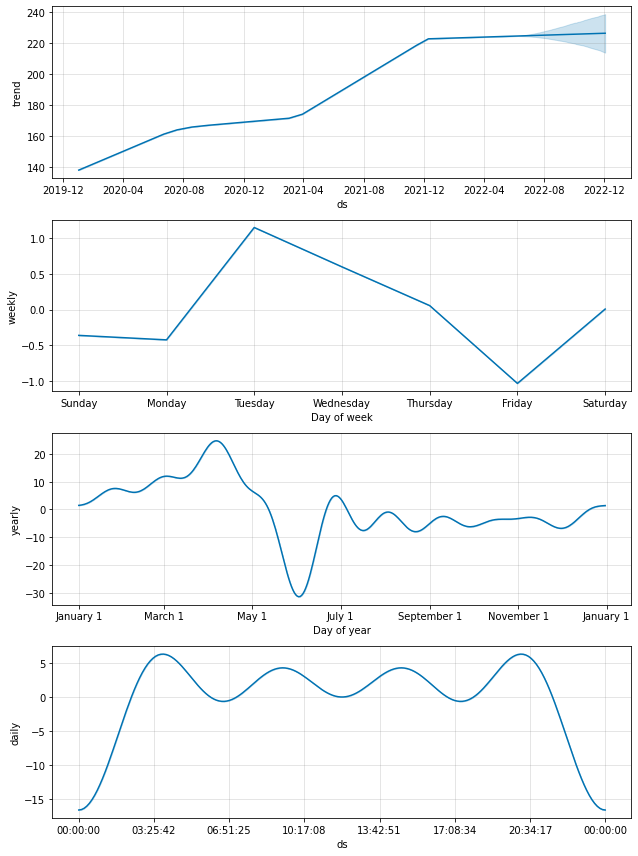

In [ ]:
plt2 = m.plot_components(forecast)

Terlihat pada hasil selasa memiliki penjualan paling tinggi, sedangkan pada hari jumat penjualan terendah. Untuk trend data, cenderung terus naik. Pada bulan Juli grafik menurun cukup banyak, tertinggi ada pada bulan April. Pada daily, grafik menunjukkan penjualan rata-rata banyak terjadi pada jam 3 pagi sampai setengah 9 malam.

## Cross Validation

*   Training data (initial): Jumlah data train (1 tahun dari Bulan Januari 2020-Januari 2021)
*   Horizon: data validasi (dari Bulan Juli 2020-Januari 2022)
*   Cutoff (period): ramalan dibuat untuk setiap titik yang diamati antara cutoff dan cutoff + horizon (dari Bulan Januari 2021-Juni 2021)
* Setelahnya adalah hasil forecasting



INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-01-02 00:00:00 and 2021-06-06 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

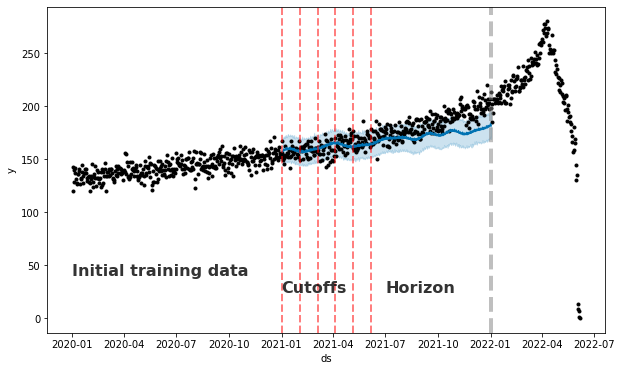

In [ ]:
# Fit the model with one years of data and define a horizon of 365 days forcasting per month
df_cv = cross_validation(m, initial='365 days', period = '31 days', horizon = '365 days')
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
#ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

# Making all the vlines for cutoffs
for item in cutoffs:
  ax.axvline(x=pd.to_datetime(item), c='red', lw=2, alpha=0.5, ls='--')

# Adding text to describe the data set splits
ax.text(x=pd.to_datetime('2020-01-01'),y=40, s='Initial training data', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2021-01-01'),y=24, s='Cutoffs', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.text(x=pd.to_datetime(cutoff) + pd.Timedelta('180 days'),y=24, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')

Mengetahui performance metrics dari model forecasting. Secara keseluruhan, hasil yang didapatkan baik dengan nilai error yang terbilang sangat kecil.

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head(5)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,39.807584,6.309325,5.031821,0.032776,0.026021,0.944444
1,37 days,40.451006,6.360111,5.102613,0.033259,0.027033,0.944444
2,38 days,38.606093,6.213380,4.884412,0.031797,0.026021,0.944444
3,39 days,38.031172,6.166942,4.844574,0.031451,0.026021,0.944444
4,40 days,34.603520,5.882476,4.660824,0.030064,0.026021,0.972222


Plotting MAPE untuk melihat lebih jelas

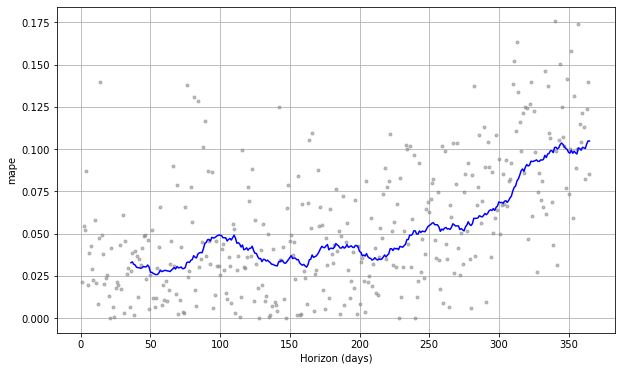

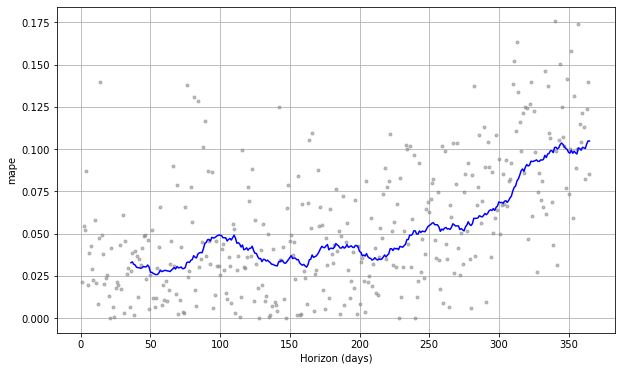

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape')

Dibuktikan dengan rata-rata performance metrics di bawah, bahwa model yang dibuat memiliki rata-rata MAPE 5% yang mana model sangat baik dan bisa digunakan untuk forecasting dengan hasil yang baik

In [ ]:
df_p.mean()

horizon     200 days 12:00:00
mse                141.230681
rmse                10.872122
mae                  9.342647
mape                 0.051608
mdape                0.048429
coverage              0.70202
dtype: object

Catatan: ada banyak perubahan antara colab dan ppt presentasi, karena telah dilakukan banyak perbaikan untuk mengoptimalkan hasil.